In [436]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()
#import Pkg; Pkg.activate(joinpath(@__DIR__,"..")); Pkg.instantiate()

  Activating environment at `~/Desktop/PHD2022/Autumn/CSE 579/CS_project/LQ_Game_Solver/Project.toml`
Precompiling project...
  ✓ DualNumbers
  ✓ CoordinateTransformations
  ✓ Quaternions
  ✓ ColorSchemes
  ✓ Rotations
  ✓ GeometryBasics
  ✓ Blink
  ✓ PlotUtils
  ✓ RigidBodyDynamics
  ✓ RecipesPipeline
  ✓ MechanismGeometries
  ✓ PlotThemes
  ✓ MeshCat
  ✓ MeshCatMechanisms
  ✓ Plots
  15 dependencies successfully precompiled in 51 seconds (168 already precompiled)
  14 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [438]:
using LinearAlgebra
using Plots
using SparseArrays
using ForwardDiff
using Random
using Test
using MeshCat
using MeshCatMechanisms
using RigidBodyDynamics
using StaticArrays

In [343]:
include("src/cost.jl")
include("src/linearize_dynamics.jl")
include("src/lqgame.jl")
include("src/solveilqgame.jl")
include("src/dynamics.jl");
include("src/diff_robot.jl");

### Differential Drive continous kinematics



\begin{split}
\dot x &= v\cos(\theta)\\
\dot y &= v\sin(\theta)\\
\dot \theta &= \omega\\
\end{split}

Where $[\dot x, \dot y, \dot \theta]$ are the state, and $[v, \omega]$ are the control inputs.

In [324]:
# Setup the problem
dt = 0.1                    # Step size [s]
H = 10.0                    # Horizon [s]
k_steps = Int(H/dt)         # Number of steps (knot points)

# Initial and final states
# x₁, y₁, θ₁     

x₀= [5.0; 0.0; pi/2; 0.0; 0.0; 5.0; 0.0; 0.0]        # Initial state
xgoal = [5.0; 10.0; pi/2; 0.0; 10.0; 5.0; 0.0; 0.0]; # Final state

In [325]:
# Define cost matrices 

Q1 = sparse(zeros(8,8))     # State cost for agent 1
Q1[1:4,1:4] = 3.0*I(4)
Qn1 = Q1                    # Terminal cost for agent 1

Q2 = sparse(zeros(8,8))     # State cost for agent 2
Q2[5:8,5:8] = 1.0*I(4)
Qn2 = Q2                    # Terminal cost for agent 2

R11 = 1.0*I(2)              # Control cost for player 1
R22 = 1.0*I(2)              # Contorl cost for player 2
R12 = sparse(zeros(2,2))    # Control cost for player 1 associated with player 2's controls
R21 = sparse(zeros(2,2))    # Control cost for player 2 associated with player 1's controls

dmax = 2.0                  # Distance that both agents should keep between each other [m]
ρ = 500.0                   # Penalty factor for violating the distance constraint

# Input constraints
umax = [2.0, 2.0, 2.0, 2.0]            
umin = [-2.0,-2.0, -2.0, -2.0];

In [327]:
# # Define cost matrices 

# Q1 = sparse(zeros(6,6))     # State cost for agent 1
# Q1[1:3,1:3] = 3.0*I(3)
# Qn1 = Q1                    # Terminal cost for agent 1

# Q2 = sparse(zeros(6,6))     # State cost for agent 2
# Q2[4:6,4:6] = 1.0*I(3)
# Qn2 = Q2                    # Terminal cost for agent 2

# R11 = 1.0*I(2)              # Control cost for player 1
# R22 = 1.0*I(2)              # Contorl cost for player 2
# R12 = sparse(zeros(2,2))    # Control cost for player 1 associated with player 2's controls
# R21 = sparse(zeros(2,2))    # Control cost for player 2 associated with player 1's controls

# dmax = 2.0                  # Distance that both agents should keep between each other [m]
# ρ = 500.0                   # Penalty factor for violating the distance constraint

# # Input constraints
# umax = [2.0, 2.0, 2.0, 2.0]            
# umin = [-2.0,-2.0, -2.0, -2.0];
# x₀= [5.0; 0.0; pi/2; 0.0; 5.0; 0.0]        # Initial state
# xgoal = [5.0; 10.0; pi/2; 10.0; 5.0; 0.0]; # Final state

In [326]:
xₜ, uₜ = solveILQGame(diff_drive, x₀, xgoal, Q1, Q2, Qn1, Qn2, R11, R12, R21, R22, umin, umax, dmax, ρ, dt, H)

([5.0 0.0 … 0.0 0.0; 5.000011188155321 0.009999992958913512 … -0.014245098993053191 0.2; … ; 5.033157736787918 10.000046446223076 … 0.0037845822007664585 -0.009849039576976451; 5.033157729678811 10.000102229070995 … 0.0037471110880902673 -0.00975152433578752], [2.0 -0.016782237905827876 2.0 -0.14245098993053193; 2.0 -0.032905623391661365 2.0 -0.1535656654809221; … ; -0.0001648754183175569 -3.766500379156191e-5 0.0009751524118893029 -0.0003747111267619128; 0.0 0.0 0.0 0.0])

In [311]:
xₜ[end,:]

8-element Vector{Float64}:
  5.004543113720172
 10.000000000000908
  1.5707963267951668
  2.0702060010484964e-15
  9.999999931206489
  4.992287446337967
  1.5912025842194639e-7
  4.444265757655994e-9

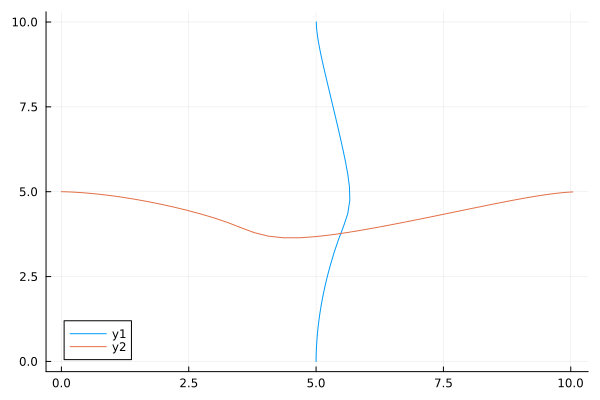

In [312]:
plot(xₜ[:, 1], xₜ[:, 2])
plot!(xₜ[:, 5], xₜ[:, 6])


In [501]:
vis = Visualizer()
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8709
└ @ MeshCat /Users/mohsafwat/.julia/packages/MeshCat/oC0sL/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), Set{Any}(), ip"127.0.0.1", 8709))

In [502]:
const URDFPATH = joinpath(@__DIR__, "turtlebots","description","turtlebot3_burger.urdf")

"/Users/mohsafwat/Desktop/PHD2022/Autumn/CSE 579/CS_project/LQ_Game_Solver/turtlebots/description/turtlebot3_burger.urdf"

In [515]:
delete!(vis)
robot = parse_urdf(URDFPATH, floating = false)
mvis = MechanismVisualizer(robot, URDFVisuals(URDFPATH), vis)
set_configuration!(mvis, [0.0, 0.0])
robot

Spanning tree:
Vertex: world (root)
  Vertex: wheel_left_link, Edge: wheel_left_joint
  Vertex: wheel_right_link, Edge: wheel_right_joint
No non-tree joints.

In [518]:
body = findbody(robot, "wheel_left_link")

RigidBody: "wheel_left_link"

In [504]:
state = MechanismState(robot, randn(2), randn(2))
t, q, v = simulate(state, 5.0);

In [506]:
anim = MeshCat.Animation(mvis, t, q)
setanimation!(mvis, anim)

In [514]:
tf = 10.0
fps = Int(round((size(xₜ)[1]-1)/tf))
anim = MeshCat.Animation(fps)
for t in 1:k_steps
    atframe(anim, t) do
        set_configuration!(mvis, xₜ[t, 1:2])
        settransform!(vis["robot"]["geom"], compose(Translation(xₜ[t, 1], xₜ[t,2],0), LinearMap(RotZ(xₜ[t,3]))))
    end
end
setanimation!(mvis, anim)


In [455]:
render(mvis)

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("wheel_left_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x6c, 0x65, 0x66, 0x74, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_wheel_left_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x65, 0x66, 0x74, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "wheel_right_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x69, 0x67, 0x68, 0x74, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_wheel_right_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x69, 0x67, 0x68, 0x74, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "after_base_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))))), Set(Any[WebSocket(server, CONNECTED), WebSocket(server, CONNECTED)]), ip"127.0.0.1", 8707))